
First 5 rows:
    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

Missing Values:
 age         0
sex         0
bmi         0
child

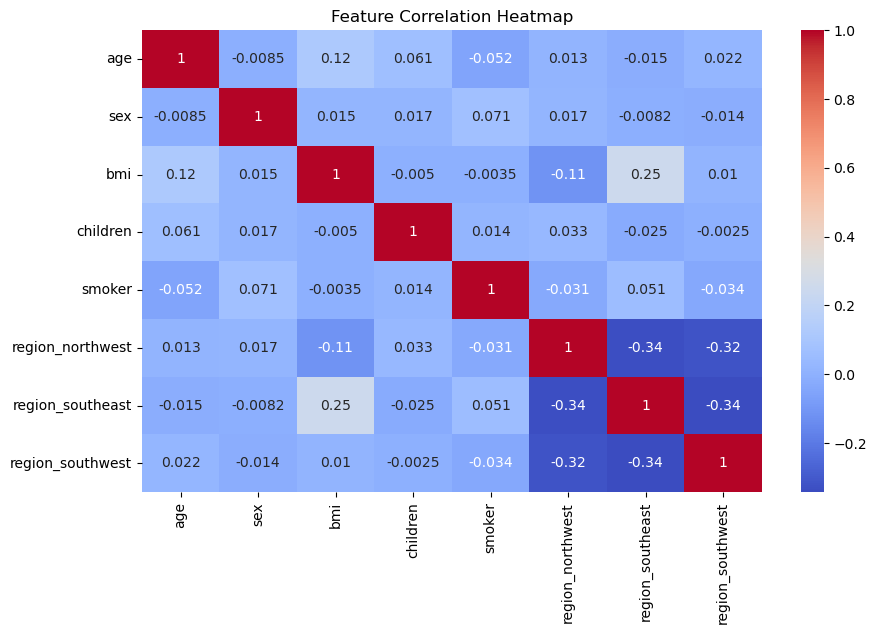


Model Performance:
R2 Score: 0.7835929767120722
RMSE: 5796.284659276274

Regression Coefficients:
             Feature  Coefficient
4            smoker  9558.481409
0               age  3614.975415
2               bmi  2036.228123
3          children   516.890247
1               sex    -9.293101
5  region_northwest  -158.140981
6  region_southeast  -290.157047
7  region_southwest  -349.110678


In [1]:
#MULTIPLE LINEAR REGRESSION
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 2. Load Dataset
df = pd.read_csv("insurance.csv")
print("\nFirst 5 rows:\n", df.head())

# 3. Business Understanding
# Target variable = charges
# Features = customer attributes

# 4. Data Inspection
print("\nDataset Info:")
df.info()

print("\nMissing Values:\n", df.isnull().sum())

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns

print("\nNumeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)

# 5. Data Cleaning & Encoding
df["sex"] = df["sex"].map({"male": 1, "female": 0})
df["smoker"] = df["smoker"].map({"yes": 1, "no": 0})

df = pd.get_dummies(df, columns=["region"], drop_first=True)

print("\nData after encoding:\n", df.head())

# 6. Feature Scaling
X = df.drop("charges", axis=1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Multicollinearity Check
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [
    variance_inflation_factor(X_train_scaled, i)
    for i in range(X_train_scaled.shape[1])
]

print("\nVIF Values:\n", vif)

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(X_train_scaled, columns=X.columns).corr(),
            annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# 8. Train Multiple Linear Regression Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 9. Model Evaluation
y_pred = model.predict(X_test_scaled)

print("\nModel Performance:")
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# 10. Coefficient Interpretation
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print("\nRegression Coefficients:\n", coefficients)
